In [1]:
import detectron2

In [1]:
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog

register_coco_instances("Car", {}, 
                        "LicensePlateData\Initial_annotated_data\Car\annotations\car_instances_default.json", 
                        "LicensePlateData\Initial_annotated_data\Car\images")


register_coco_instances("Bike", {}, 
                        "LicensePlateData\Initial_annotated_data\Bike\annotations\bike_instances_default.json", 
                        "LicensePlateData\Initial_annotated_data\Bike\images")

car_metadata = MetadataCatalog.get("Car")
bike_metadata = MetadataCatalog.get("Bike")
print(car_metadata)
print(bike_metadata)


Metadata(name='Car', json_file='LicensePlateData\\Initial_annotated_data\\Car\x07nnotations\\car_instances_default.json', image_root='LicensePlateData\\Initial_annotated_data\\Car\\images', evaluator_type='coco')
Metadata(name='Bike', json_file='LicensePlateData\\Initial_annotated_data\\Bike\x07nnotations\x08ike_instances_default.json', image_root='LicensePlateData\\Initial_annotated_data\\Bike\\images', evaluator_type='coco')


Checking annotations

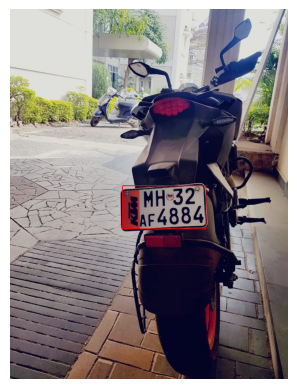

In [10]:
import cv2
import json
import matplotlib.pyplot as plt
import os

annotation_path = r"LicensePlateData\Initial_annotated_data\Bike\annotations\bike_instances_default.json"
with open(annotation_path) as f:
    data = json.load(f)

image_filename = "5.jpg"
image_path = os.path.join("LicensePlateData", "Initial_annotated_data", "Bike", "images", image_filename)

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_id = None
for img in data["images"]:
    if img["file_name"] == image_filename:
        image_id = img["id"]
        break

for ann in data["annotations"]:
    if ann["image_id"] == image_id:  
        x, y, w, h = ann["bbox"]
        cv2.rectangle(image, (int(x), int(y)), (int(x + w), int(y + h)), (255, 0, 0), 2)

plt.imshow(image)
plt.axis("off")
plt.show()
